<a href="https://colab.research.google.com/github/pvt-16/pythonprojects/blob/master/WhatsappAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import torch
import re
import pandas as pd

In [0]:
def startsWithDateTime(s):
    pattern = '^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)\d{4}, ([0-9][0-9]):([0-9][0-9]) -'
    result = re.match(pattern, s)
    if result:
        return True
    return False  

In [0]:
def startsWithAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([+]\d{2} \d{4} \d{7})'           # Mobile Number (Europe)
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [0]:
def getDataPoint(line):
    # line = 18/06/17, 22:47 - Loki: Why do you have 2 numbers, Banner?
    
    splitLine = line.split(' - ') # splitLine = ['18/06/17, 22:47', 'Loki: Why do you have 2 numbers, Banner?']
    
    dateTime = splitLine[0] # dateTime = '18/06/17, 22:47'
    
    date, time = dateTime.split(', ') # date = '18/06/17'; time = '22:47'
    
    message = ' '.join(splitLine[1:]) # message = 'Loki: Why do you have 2 numbers, Banner?'
    
    if startsWithAuthor(message): # True
        splitMessage = message.split(': ') # splitMessage = ['Loki', 'Why do you have 2 numbers, Banner?']
        author = splitMessage[0] # author = 'Loki'
        message = ' '.join(splitMessage[1:]) # message = 'Why do you have 2 numbers, Banner?'
    else:
        author = None
    return date, time, author, message

In [0]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = './WhatsApp Chat with BYOB-Bangalore.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file (usually contains information about end-to-end encryption)
        
    messageBuffer = [] # Buffer to capture intermediate output for multi-line messages
    date, time, author = None, None, None # Intermediate variables to keep track of the current message being processed
    
    count = 0
    while True:
        line = fp.readline() 
        #print(line)
        if not line or count > 50000: # Stop reading further if end of file has been reached
            break
        line = line.strip() # Guarding against erroneous leading and trailing whitespaces
        if startsWithDateTime(line): # If a line starts with a Date Time pattern, then this indicates the beginning of a new message
            if len(messageBuffer) > 0: # Check if the message buffer contains characters from previous iterations
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) # Save the tokens from the previous message in parsedData
            #print(parsedData)
            messageBuffer.clear() # Clear the message buffer so that it can be used for the next message
            date, time, author, message = getDataPoint(line) # Identify and extract tokens from the line
            messageBuffer.append(message) # Append message to buffer
        else:
            messageBuffer.append(line) # If a line doesn't start with a Date Time pattern, then it is part of a multi-line message. So, just append to buffer
        count += 1

In [29]:
#pd is pandas library
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
df.head()


,Date,Time,Author,Message
0,25/09/2016,21:50,None,"Pratyush BYOB created group ""BYOB-Bangalore"""
1,18/06/2017,22:37,None,Pratyush BYOB added you
2,18/06/2017,22:37,None,Pratyush BYOB added Mr. CTO
3,18/06/2017,22:37,None,Pratyush BYOB added +91 75065 02224
4,18/06/2017,22:29,Pratyush BYOB,Hello new members. Despite our cricket team de...


In [30]:
# f= open("./WhatsApp Chat with BYOB-Bangalore.txt","r")
# content=f.read()
#startsWithDateTime("18/06/17, 22:47 - Loki: Why do you have 2 numbers, Banner?")

df.tail()
#startsWithDateTime('25/09/2016, 21:50 - Pratyush BYOB created group "BYOB-Bangalore"')

,Date,Time,Author,Message
17716,28/04/2019,17:43,+91 99726 13977,Would buy it today. Thanks for the response.
17717,28/04/2019,18:04,+91 96630 00822,and whr is it?
17718,28/04/2019,18:05,Anand BYOB,Koramangala area ...
17719,28/04/2019,18:10,+91 96630 00822,👍
17720,29/04/2019,09:00,+91 97403 61494,Hopefully I will get a chance to talk about my...


In [31]:
df.describe()

,Date,Time,Author,Message
count,17721,17721,17360,17721
unique,612,1281,92,13952
top,22/09/2017,20:15,Anand BYOB,<Media omitted>
freq,266,45,2826,1475


In [10]:
!pip install data-anonymizer-mapper

     |████████████████████████████████| 880kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/65/c3/97/d4d68915a0735f46ddb2ff412825aa2d71bd23dbf88a84407e
Successfully built data-anonymizer-mapper


In [0]:
from anonymizer import Anonymizer
anonymizer = Anonymizer()
df['Author'] = df['Author'].apply(lambda s : anonymizer.get_anonymized_name(s) if s is not None else s)

In [34]:
df.head()

,Date,Time,Author,Message
0,25/09/2016,21:50,None,"Pratyush BYOB created group ""BYOB-Bangalore"""
1,18/06/2017,22:37,None,Pratyush BYOB added you
2,18/06/2017,22:37,None,Pratyush BYOB added Mr. CTO
3,18/06/2017,22:37,None,Pratyush BYOB added +91 75065 02224
4,18/06/2017,22:29,Samantha Perry,Hello new members. Despite our cricket team de...


In [35]:
df.tail()

,Date,Time,Author,Message
17716,28/04/2019,17:43,Barbara Torres,Would buy it today. Thanks for the response.
17717,28/04/2019,18:04,Ryan Sloan,and whr is it?
17718,28/04/2019,18:05,Joshua Peterson MD,Koramangala area ...
17719,28/04/2019,18:10,Ryan Sloan,👍
17720,29/04/2019,09:00,Maurice Wilcox,Hopefully I will get a chance to talk about my...


In [36]:
df.describe()


,Date,Time,Author,Message
count,17721,17721,17360,17721
unique,612,1281,92,13952
top,22/09/2017,20:15,Joshua Peterson MD,<Media omitted>
freq,266,45,2826,1475


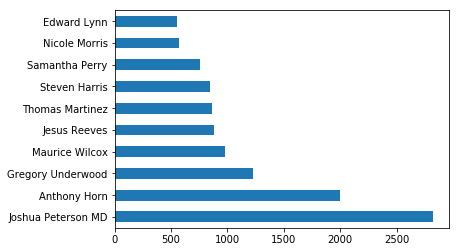

In [37]:
author_value_counts = df['Author'].value_counts() # Number of messages per author
top_10_author_value_counts = author_value_counts.head(10) # Number of messages per author for the top 10 most active authors
top_10_author_value_counts.plot.barh() # Plot a bar chart using pandas built-in plotting apis

In [41]:
null_authors_df = df[df['Author'].isnull()]
null_authors_df.head()

,Date,Time,Author,Message
0,25/09/2016,21:50,None,"Pratyush BYOB created group ""BYOB-Bangalore"""
1,18/06/2017,22:37,None,Pratyush BYOB added you
2,18/06/2017,22:37,None,Pratyush BYOB added Mr. CTO
3,18/06/2017,22:37,None,Pratyush BYOB added +91 75065 02224
73,19/06/2017,13:45,None,+91 98115 22612 left


In [51]:
media_messages_df = df[df['Message'] == '<Media omitted>']

#df.shape[0] gives you the row count
print(media_messages_df.shape[0])

1475


In [54]:
#gives the count of messages by each author
df['Author'].value_counts()

#gives the count of <Media omitted> messages by each author
media_messages_df['Author'].value_counts()

media_messages_df['Author'].head(10)

11            Edward Lynn
173           Edward Lynn
224        Maurice Wilcox
237    Joshua Peterson MD
313        Samantha Perry
325    Joshua Peterson MD
327    Joshua Peterson MD
336           Michelle Li
348         Jennifer Long
349         Jennifer Long
Name: Author, dtype: object